In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('height.csv')

In [3]:
df.head()

,Weight,Height
0,70,175
1,55,165
2,75,180
3,50,160
4,65,172


In [6]:
df.describe()

,Weight,Height
count,90.000000,90.000000
mean,66.555556,171.022222
std,9.750956,8.129538
min,47.000000,155.000000
25%,58.000000,165.000000
50%,68.000000,171.000000
75%,75.000000,178.000000
max,84.000000,185.000000


Text(0, 0.5, 'Height')

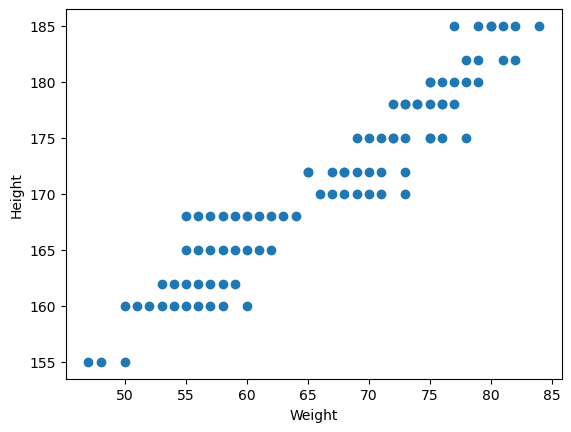

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [13]:
X=df[['Weight']]
y=df['Height']

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

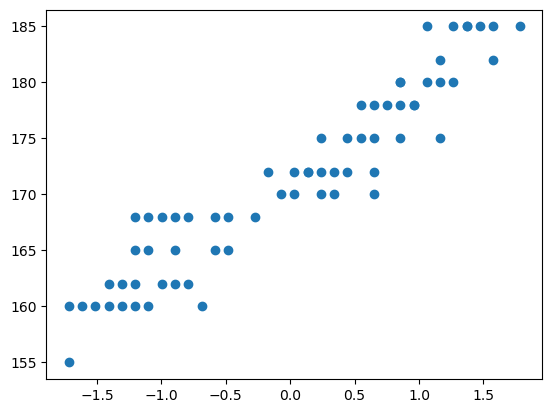

In [19]:
plt.scatter(X_train,y_train)

In [22]:
regressor=LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
regressor.coef_

array([7.6459145])

In [25]:
regressor.intercept_

171.32835820895522

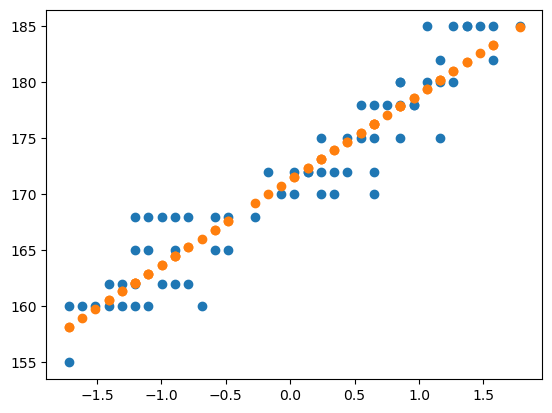

In [29]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train))

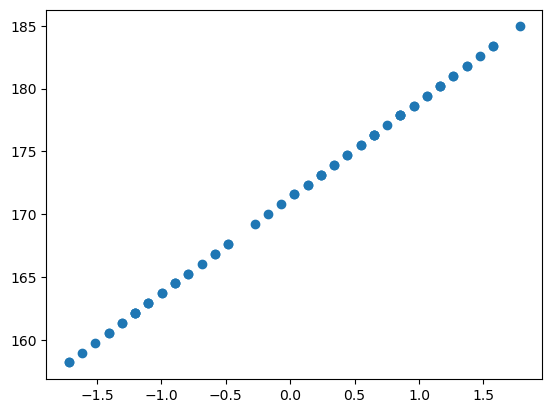

In [30]:
y_pred_test=regressor.predict(X_test)

In [31]:
y_pred_test

array([182.59077783, 172.3618232 , 165.28023922, 177.86972185,
       173.93550853, 181.0170925 , 166.06708189, 176.29603652,
       156.62496992, 175.50919386, 178.65656451, 155.83812726,
       177.08287918, 179.44340718, 168.42760988, 170.00129521,
       178.65656451, 163.7065539 , 162.91971123, 166.06708189,
       174.72235119, 163.7065539 , 164.49339656])

In [33]:
y_test

40    182
22    170
55    165
70    175
0     175
26    182
39    168
65    178
10    155
44    175
81    175
35    155
56    178
86    178
12    168
4     172
18    180
28    165
49    162
62    165
73    170
69    160
76    160
Name: Height, dtype: int64

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4.728131318678811
1.7716746623503281
2.1744266643597827


In [39]:
from sklearn.metrics import r2_score

In [40]:
score=r2_score(y_test,y_pred_test)
score

0.9265524911146682

In [41]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9230549906915572